In [59]:
#!usr/bin/env python
#-*- coding: utf-8 -*-

import sys
import os
import time
from sklearn import metrics
import numpy as np
import pickle as pickle
import importlib 
import pandas as pd
from sklearn.cross_validation import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from sklearn.ensemble import GradientBoostingClassifier

#%matplotlib inline 

#str_temp = "DT_MON	CUST_ID	CK_AGMT_BAL	CK_COMP_LAST_MON_BAL1	CK_COMP_LAST_MON_BAL2	CK_COMP_LAST_MON_BAL3	CK_YEAR_AVG_BAL	CK_COMP_LAST_MON_YEARAVG_BAL1	CK_COMP_LAST_MON_YEARAVG_BAL2	CK_COMP_LAST_MON_YEARAVG_BAL3	DK_AGMT_BAL	DK_COMP_LAST_MON_BAL1	DK_COMP_LAST_MON_BAL2	DK_COMP_LAST_MON_BAL3	DK_COMP_LAST_MON_YEARAVG_BAL1	DK_COMP_LAST_MON_YEARAVG_BAL2	DK_COMP_LAST_MON_YEARAVG_BAL3	FIN_BAL	FIN_BAL_SM	FIN_BAL_SQ	YEAR_FIN_BAL	YEAR_FIN_BAL_SM	YEAR_FIN_BAL_SQ	DF_AMT	DF_RT	DF_CNT	LST_1M_AMT	LST_1M_TT	LST_1M_CNT	LST_2M_AMT	LST_2M_TT	LST_2M_CNT	DK_SHUI	DK_DIAN	DK_MEI	IND_JBH	IND_WY	IND_YTZH	IND_YTCYL	IND_BGYDT	IND_JST	IND_DF	IND_CCARD	IND_FUND	IND_QS	IND_TXP	IND_BOND	IND_SX	IND_BX	IND_DLB	IND_SFCG	IND_YQT	IND_SJYH	IND_TALC	IND_GOLD	IND_JYT	IND_EJZH	IND_XJC	IND_YTDB	IND_PJC	IND_WBXJC	IND_LDXJC	IND_JZSF	IND_YQZTC	IND_YTSZ	IND_BZT	IND_ZBT	IND_JSK	IND_EJFH	IND_DLZY	IND_DLDF	IND_DLMK	IND_ZHQC	IND_DFGZ	IND_CKH	IND_HQCK	IND_XDCK	IND_DWHQ	IND_SG	IND_YQZZ	IND_RZRQ	REG_CAPT_AMT	A00	A01	A02	B00	B01	B02	B03	B04	B05	B06	B07	B08	B09	B10	B11	B12	B13	B14	B15	C00	C01	C02	C03	D00	D01	D02	D03	D04	E00	E01	E02	F00	F01	F02	F03	F04	F05	F06	F07	G00	G01	G02	G03	G04	G05	G06	M00	M01	M02	M03	M04	M05	M06	M07	Y01	Z00	Z01	INTER_RATING_CD	O_INDUSTRY_CD	S_INDUSTRY_CD	T_INDUSTRY_CD	F_INDUSTRY_CD	CUS_SCALE_TP_CD	ORG_TP_CD	INDUSTRY_TP_CD	INDUSTRY_MAIN_TP_CD	CUS_LAYER_CD	CUS_CLASS_CD	CUS_GRADE_CD	LMT_STATE_CD	CREDIT_LINE_CD	AERA	BAS_AC_IS_BOCOM	OWN_GROUP_NO	OWN_GROUP_LAYER	OWN_GROUP_CLASS	OWN_GROUP_GRADE	STRATEGIC_CUST	STRATEGIC_MGR_CODE	APPROVED_LMT	APPROVED_RISK_LMT	BAL	RISK_BAL	ORI_BAL	ZT_LMT	LXD_LMT	ENTSTATUS	IS_SHIXIN	IS_ANDI	IS_PERFORMANCE	IS_GL_SHIXIN	IS_GL_ANDI	IS_GL_PERFORMANCE	IS_YJ"
#print(str_temp.split('	'))

#print(pd.__version__)

#headers = ['DT_MON', 'CUST_ID', 'CK_AGMT_BAL', 'CK_COMP_LAST_MON_BAL1', 'CK_COMP_LAST_MON_BAL2', 'CK_COMP_LAST_MON_BAL3', 'CK_YEAR_AVG_BAL', 'CK_COMP_LAST_MON_YEARAVG_BAL1', 'CK_COMP_LAST_MON_YEARAVG_BAL2', 'CK_COMP_LAST_MON_YEARAVG_BAL3', 'DK_AGMT_BAL', 'DK_COMP_LAST_MON_BAL1', 'DK_COMP_LAST_MON_BAL2', 'DK_COMP_LAST_MON_BAL3', 'DK_COMP_LAST_MON_YEARAVG_BAL1', 'DK_COMP_LAST_MON_YEARAVG_BAL2', 'DK_COMP_LAST_MON_YEARAVG_BAL3', 'FIN_BAL', 'FIN_BAL_SM', 'FIN_BAL_SQ', 'YEAR_FIN_BAL', 'YEAR_FIN_BAL_SM', 'YEAR_FIN_BAL_SQ', 'DF_AMT', 'DF_RT', 'DF_CNT', 'LST_1M_AMT', 'LST_1M_TT', 'LST_1M_CNT', 'LST_2M_AMT', 'LST_2M_TT', 'LST_2M_CNT', 'DK_SHUI', 'DK_DIAN', 'DK_MEI', 'IND_JBH', 'IND_WY', 'IND_YTZH', 'IND_YTCYL', 'IND_BGYDT', 'IND_JST', 'IND_DF', 'IND_CCARD', 'IND_FUND', 'IND_QS', 'IND_TXP', 'IND_BOND', 'IND_SX', 'IND_BX', 'IND_DLB', 'IND_SFCG', 'IND_YQT', 'IND_SJYH', 'IND_TALC', 'IND_GOLD', 'IND_JYT', 'IND_EJZH', 'IND_XJC', 'IND_YTDB', 'IND_PJC', 'IND_WBXJC', 'IND_LDXJC', 'IND_JZSF', 'IND_YQZTC', 'IND_YTSZ', 'IND_BZT', 'IND_ZBT', 'IND_JSK', 'IND_EJFH', 'IND_DLZY', 'IND_DLDF', 'IND_DLMK', 'IND_ZHQC', 'IND_DFGZ', 'IND_CKH', 'IND_HQCK', 'IND_XDCK', 'IND_DWHQ', 'IND_SG', 'IND_YQZZ', 'IND_RZRQ', 'REG_CAPT_AMT', 'A00', 'A01', 'A02', 'B00', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'C00', 'C01', 'C02', 'C03', 'D00', 'D01', 'D02', 'D03', 'D04', 'E00', 'E01', 'E02', 'F00', 'F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'G00', 'G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'M00', 'M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'Y01', 'Z00', 'Z01', 'INTER_RATING_CD', 'O_INDUSTRY_CD', 'S_INDUSTRY_CD', 'T_INDUSTRY_CD', 'F_INDUSTRY_CD', 'CUS_SCALE_TP_CD', 'ORG_TP_CD', 'INDUSTRY_TP_CD', 'INDUSTRY_MAIN_TP_CD', 'CUS_LAYER_CD', 'CUS_CLASS_CD', 'CUS_GRADE_CD', 'LMT_STATE_CD', 'CREDIT_LINE_CD', 'AERA', 'BAS_AC_IS_BOCOM', 'OWN_GROUP_NO', 'OWN_GROUP_LAYER', 'OWN_GROUP_CLASS', 'OWN_GROUP_GRADE', 'STRATEGIC_CUST', 'STRATEGIC_MGR_CODE', 'APPROVED_LMT', 'APPROVED_RISK_LMT', 'BAL', 'RISK_BAL', 'ORI_BAL', 'ZT_LMT', 'LXD_LMT', 'ENTSTATUS', 'IS_SHIXIN', 'IS_ANDI', 'IS_PERFORMANCE', 'IS_GL_SHIXIN', 'IS_GL_ANDI', 'IS_GL_PERFORMANCE', 'IS_YJ']
#df = pd.read_csv("C:\\Dev\TSS\\Bank_COMM\\risk.csv", sep = ',', names = headers)

#df.iloc[0,:]

#df.loc[df['IS_YJ'] == 1]





reading training and testing data...
1681
(14571, 171)
(14571,)
(6246, 171)
(6246,)
<class 'pandas.core.frame.DataFrame'>
******************** Data Info *********************
#training data: 14571, #testing_data: 6246, dimension: 171
171
171
(array([ 97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
       136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
       149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
       162, 163, 164, 165, 166, 167, 168, 169, 170], dtype=int64),)
74
precision: 54.17%, recall: 15.06%
accuracy: 91.90%


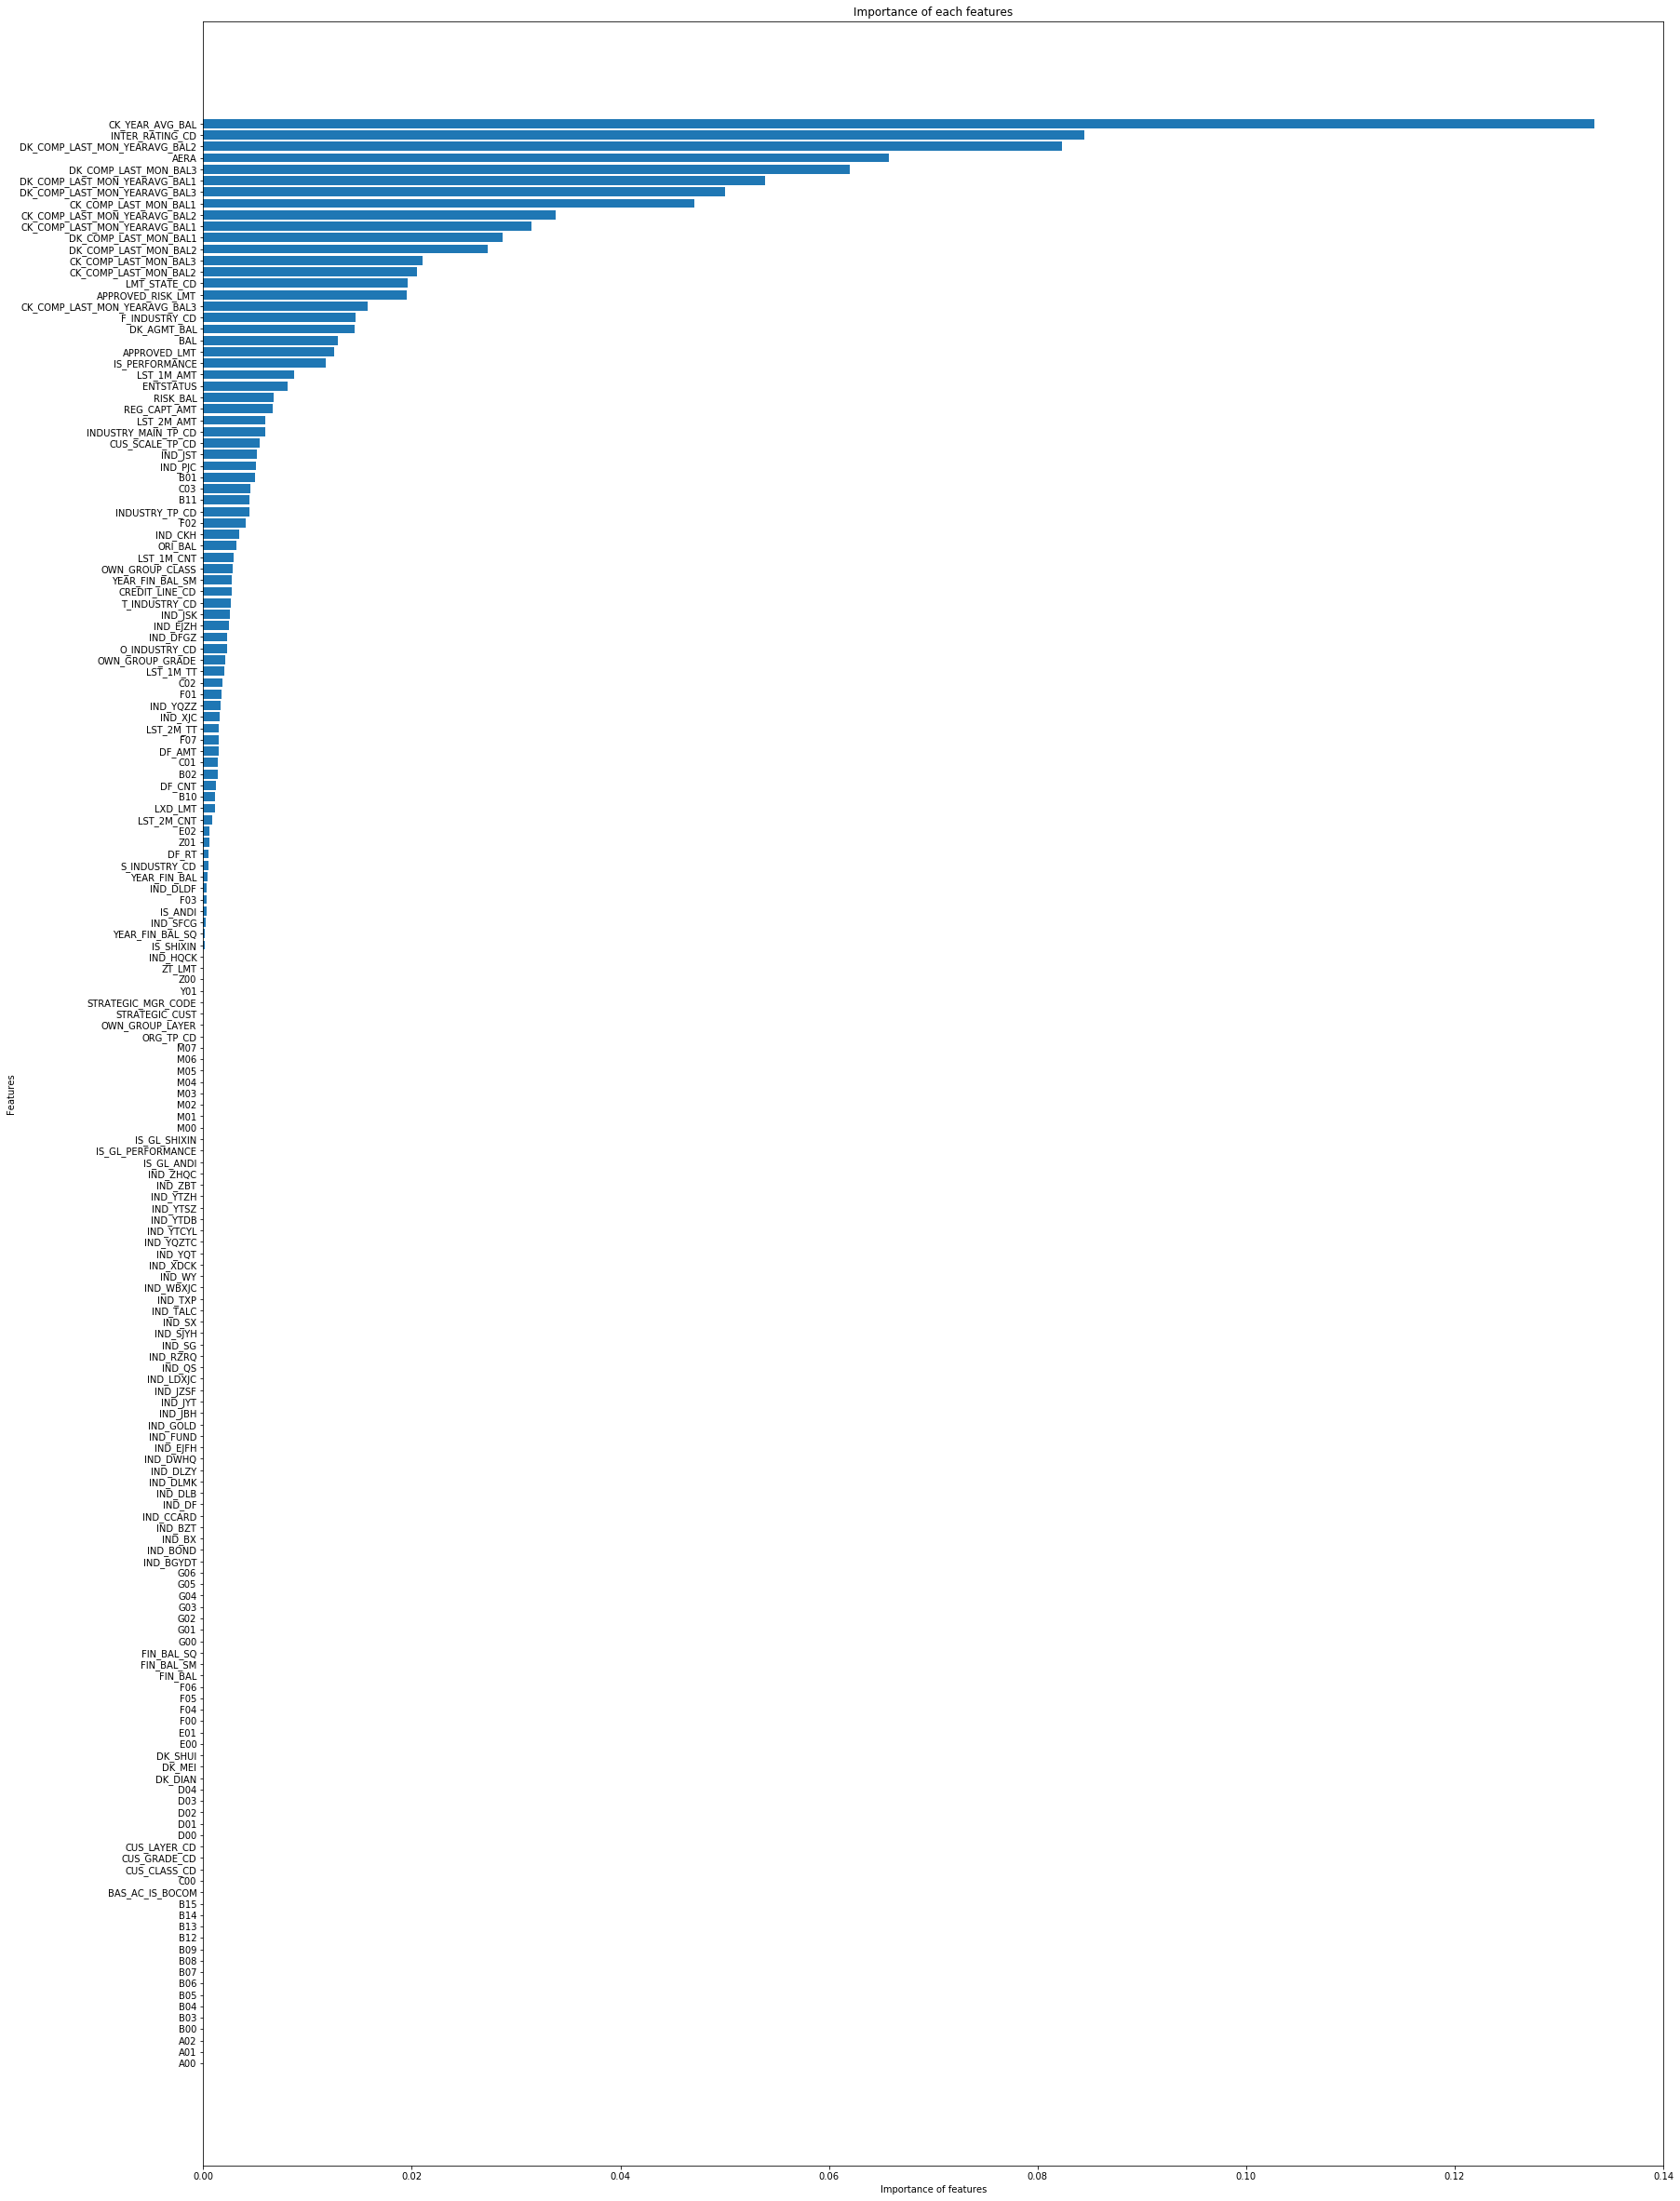

In [60]:
# Multinomial Naive Bayes Classifier
def naive_bayes_classifier(train_x, train_y):
    from sklearn.naive_bayes import MultinomialNB
    model = MultinomialNB(alpha=0.01)
    model.fit(train_x, train_y)
    return model


# KNN Classifier
def knn_classifier(train_x, train_y):
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier()
    model.fit(train_x, train_y)
    return model


# Logistic Regression Classifier
def logistic_regression_classifier(train_x, train_y):
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression(penalty='l2')
    model.fit(train_x, train_y)
    return model


# Random Forest Classifier
def random_forest_classifier(train_x, train_y):
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators=8)
    model.fit(train_x, train_y)
    return model


# Decision Tree Classifier
def decision_tree_classifier(train_x, train_y):
    from sklearn import tree
    model = tree.DecisionTreeClassifier()
    model.fit(train_x, train_y)
    return model


# GBDT(Gradient Boosting Decision Tree) Classifier
def gradient_boosting_classifier(train_x, train_y):
    from sklearn.ensemble import GradientBoostingClassifier
    model = GradientBoostingClassifier(n_estimators=200)
    model.fit(train_x, train_y)
    return model


# SVM Classifier
def svm_classifier(train_x, train_y):
    from sklearn.svm import SVC
    model = SVC(kernel='rbf', probability=True)
    model.fit(train_x, train_y)
    return model

# SVM Classifier using cross validation
def svm_cross_validation(train_x, train_y):
    from sklearn.grid_search import GridSearchCV
    from sklearn.svm import SVC
    model = SVC(kernel='rbf', probability=True)
    param_grid = {'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], 'gamma': [0.001, 0.0001]}
    grid_search = GridSearchCV(model, param_grid, n_jobs = 1, verbose=1)
    grid_search.fit(train_x, train_y)
    best_parameters = grid_search.best_estimator_.get_params()
    for para, val in best_parameters.items():
        print(para, val)
    model = SVC(kernel='rbf', C=best_parameters['C'], gamma=best_parameters['gamma'], probability=True)
    model.fit(train_x, train_y)
    return model

def read_data(data_file):

    #headers = ['DT_MON', 'CUST_ID', 'CK_AGMT_BAL', 'CK_COMP_LAST_MON_BAL1', 'CK_COMP_LAST_MON_BAL2', 'CK_COMP_LAST_MON_BAL3', 'CK_YEAR_AVG_BAL', 'CK_COMP_LAST_MON_YEARAVG_BAL1', 'CK_COMP_LAST_MON_YEARAVG_BAL2', 'CK_COMP_LAST_MON_YEARAVG_BAL3', 'DK_AGMT_BAL', 'DK_COMP_LAST_MON_BAL1', 'DK_COMP_LAST_MON_BAL2', 'DK_COMP_LAST_MON_BAL3', 'DK_COMP_LAST_MON_YEARAVG_BAL1', 'DK_COMP_LAST_MON_YEARAVG_BAL2', 'DK_COMP_LAST_MON_YEARAVG_BAL3', 'FIN_BAL', 'FIN_BAL_SM', 'FIN_BAL_SQ', 'YEAR_FIN_BAL', 'YEAR_FIN_BAL_SM', 'YEAR_FIN_BAL_SQ', 'DF_AMT', 'DF_RT', 'DF_CNT', 'LST_1M_AMT', 'LST_1M_TT', 'LST_1M_CNT', 'LST_2M_AMT', 'LST_2M_TT', 'LST_2M_CNT', 'DK_SHUI', 'DK_DIAN', 'DK_MEI', 'IND_JBH', 'IND_WY', 'IND_YTZH', 'IND_YTCYL', 'IND_BGYDT', 'IND_JST', 'IND_DF', 'IND_CCARD', 'IND_FUND', 'IND_QS', 'IND_TXP', 'IND_BOND', 'IND_SX', 'IND_BX', 'IND_DLB', 'IND_SFCG', 'IND_YQT', 'IND_SJYH', 'IND_TALC', 'IND_GOLD', 'IND_JYT', 'IND_EJZH', 'IND_XJC', 'IND_YTDB', 'IND_PJC', 'IND_WBXJC', 'IND_LDXJC', 'IND_JZSF', 'IND_YQZTC', 'IND_YTSZ', 'IND_BZT', 'IND_ZBT', 'IND_JSK', 'IND_EJFH', 'IND_DLZY', 'IND_DLDF', 'IND_DLMK', 'IND_ZHQC', 'IND_DFGZ', 'IND_CKH', 'IND_HQCK', 'IND_XDCK', 'IND_DWHQ', 'IND_SG', 'IND_YQZZ', 'IND_RZRQ', 'REG_CAPT_AMT', 'A00', 'A01', 'A02', 'B00', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'C00', 'C01', 'C02', 'C03', 'D00', 'D01', 'D02', 'D03', 'D04', 'E00', 'E01', 'E02', 'F00', 'F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'G00', 'G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'M00', 'M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'Y01', 'Z00', 'Z01', 'INTER_RATING_CD', 'O_INDUSTRY_CD', 'S_INDUSTRY_CD', 'T_INDUSTRY_CD', 'F_INDUSTRY_CD', 'CUS_SCALE_TP_CD', 'ORG_TP_CD', 'INDUSTRY_TP_CD', 'INDUSTRY_MAIN_TP_CD', 'CUS_LAYER_CD', 'CUS_CLASS_CD', 'CUS_GRADE_CD', 'LMT_STATE_CD', 'CREDIT_LINE_CD', 'AERA', 'BAS_AC_IS_BOCOM', 'OWN_GROUP_NO', 'OWN_GROUP_LAYER', 'OWN_GROUP_CLASS', 'OWN_GROUP_GRADE', 'STRATEGIC_CUST', 'STRATEGIC_MGR_CODE', 'APPROVED_LMT', 'APPROVED_RISK_LMT', 'BAL', 'RISK_BAL', 'ORI_BAL', 'ZT_LMT', 'LXD_LMT', 'ENTSTATUS', 'IS_SHIXIN', 'IS_ANDI', 'IS_PERFORMANCE', 'IS_GL_SHIXIN', 'IS_GL_ANDI', 'IS_GL_PERFORMANCE', 'IS_YJ']
    #df = pd.read_csv("C:\\Dev\TSS\\Bank_COMM\\risk_update.csv", sep = ',', names = headers, converters={
    #'BAS_AC_IS_BOCOM': lambda x: np.where(x == "Y", 1, 0),
    #'STRATEGIC_CUST': lambda x: np.where(x == "Y", 1, 0)
    #})
    
    
    
#    print(df.loc[:,'OWN_GROUP_NO'])
   
    #Use df.iloc[:,0:16] instead (or df[['A1', 'A2', 'A3', ...]], but that is more cumbersome in your case):
    
    #cols = ['DT_MON', 'CUST_ID', 'CK_AGMT_BAL', 'CK_COMP_LAST_MON_BAL1', 'CK_COMP_LAST_MON_BAL2', 'CK_COMP_LAST_MON_BAL3', 'CK_YEAR_AVG_BAL', 'CK_COMP_LAST_MON_YEARAVG_BAL1', 'CK_COMP_LAST_MON_YEARAVG_BAL2', 'CK_COMP_LAST_MON_YEARAVG_BAL3', 'DK_AGMT_BAL', 'DK_COMP_LAST_MON_BAL1', 'DK_COMP_LAST_MON_BAL2', 'DK_COMP_LAST_MON_BAL3', 'DK_COMP_LAST_MON_YEARAVG_BAL1', 'DK_COMP_LAST_MON_YEARAVG_BAL2', 'DK_COMP_LAST_MON_YEARAVG_BAL3', 'FIN_BAL', 'FIN_BAL_SM', 'FIN_BAL_SQ', 'YEAR_FIN_BAL', 'YEAR_FIN_BAL_SM', 'YEAR_FIN_BAL_SQ', 'DF_AMT', 'DF_RT', 'DF_CNT', 'LST_1M_AMT', 'LST_1M_TT', 'LST_1M_CNT', 'LST_2M_AMT', 'LST_2M_TT', 'LST_2M_CNT', 'DK_SHUI', 'DK_DIAN', 'DK_MEI', 'IND_JBH', 'IND_WY', 'IND_YTZH', 'IND_YTCYL', 'IND_BGYDT', 'IND_JST', 'IND_DF', 'IND_CCARD', 'IND_FUND', 'IND_QS', 'IND_TXP', 'IND_BOND', 'IND_SX', 'IND_BX', 'IND_DLB', 'IND_SFCG', 'IND_YQT', 'IND_SJYH', 'IND_TALC', 'IND_GOLD', 'IND_JYT', 'IND_EJZH', 'IND_XJC', 'IND_YTDB', 'IND_PJC', 'IND_WBXJC', 'IND_LDXJC', 'IND_JZSF', 'IND_YQZTC', 'IND_YTSZ', 'IND_BZT', 'IND_ZBT', 'IND_JSK', 'IND_EJFH', 'IND_DLZY', 'IND_DLDF', 'IND_DLMK', 'IND_ZHQC', 'IND_DFGZ', 'IND_CKH', 'IND_HQCK', 'IND_XDCK', 'IND_DWHQ', 'IND_SG', 'IND_YQZZ', 'IND_RZRQ', 'REG_CAPT_AMT', 'A00', 'A01', 'A02', 'B00', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'C00', 'C01', 'C02', 'C03', 'D00', 'D01', 'D02', 'D03', 'D04', 'E00', 'E01', 'E02', 'F00', 'F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'G00', 'G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'M00', 'M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'Y01', 'Z00', 'Z01', 'INTER_RATING_CD', 'O_INDUSTRY_CD', 'S_INDUSTRY_CD', 'T_INDUSTRY_CD', 'F_INDUSTRY_CD', 'CUS_SCALE_TP_CD', 'ORG_TP_CD', 'INDUSTRY_TP_CD', 'INDUSTRY_MAIN_TP_CD', 'CUS_LAYER_CD', 'CUS_CLASS_CD', 'CUS_GRADE_CD', 'LMT_STATE_CD', 'CREDIT_LINE_CD', 'AERA', 'BAS_AC_IS_BOCOM', 'OWN_GROUP_LAYER', 'OWN_GROUP_CLASS', 'OWN_GROUP_GRADE', 'STRATEGIC_CUST', 'STRATEGIC_MGR_CODE', 'APPROVED_LMT', 'APPROVED_RISK_LMT', 'BAL', 'RISK_BAL', 'ORI_BAL', 'ZT_LMT', 'LXD_LMT', 'ENTSTATUS', 'IS_SHIXIN', 'IS_ANDI', 'IS_PERFORMANCE', 'IS_GL_SHIXIN', 'IS_GL_ANDI', 'IS_GL_PERFORMANCE', 'IS_YJ'] 
    #update_pd = pd.DataFrame(df,columns =cols)
    
    #update_pd.to_csv("C:\\Dev\TSS\\Bank_COMM\\risk_update_2.csv")
    headers = ['CK_AGMT_BAL', 'CK_COMP_LAST_MON_BAL1', 'CK_COMP_LAST_MON_BAL2', 'CK_COMP_LAST_MON_BAL3', 'CK_YEAR_AVG_BAL', 'CK_COMP_LAST_MON_YEARAVG_BAL1', 'CK_COMP_LAST_MON_YEARAVG_BAL2', 'CK_COMP_LAST_MON_YEARAVG_BAL3', 'DK_AGMT_BAL', 'DK_COMP_LAST_MON_BAL1', 'DK_COMP_LAST_MON_BAL2', 'DK_COMP_LAST_MON_BAL3', 'DK_COMP_LAST_MON_YEARAVG_BAL1', 'DK_COMP_LAST_MON_YEARAVG_BAL2', 'DK_COMP_LAST_MON_YEARAVG_BAL3', 'FIN_BAL', 'FIN_BAL_SM', 'FIN_BAL_SQ', 'YEAR_FIN_BAL', 'YEAR_FIN_BAL_SM', 'YEAR_FIN_BAL_SQ', 'DF_AMT', 'DF_RT', 'DF_CNT', 'LST_1M_AMT', 'LST_1M_TT', 'LST_1M_CNT', 'LST_2M_AMT', 'LST_2M_TT', 'LST_2M_CNT', 'DK_SHUI', 'DK_DIAN', 'DK_MEI', 'IND_JBH', 'IND_WY', 'IND_YTZH', 'IND_YTCYL', 'IND_BGYDT', 'IND_JST', 'IND_DF', 'IND_CCARD', 'IND_FUND', 'IND_QS', 'IND_TXP', 'IND_BOND', 'IND_SX', 'IND_BX', 'IND_DLB', 'IND_SFCG', 'IND_YQT', 'IND_SJYH', 'IND_TALC', 'IND_GOLD', 'IND_JYT', 'IND_EJZH', 'IND_XJC', 'IND_YTDB', 'IND_PJC', 'IND_WBXJC', 'IND_LDXJC', 'IND_JZSF', 'IND_YQZTC', 'IND_YTSZ', 'IND_BZT', 'IND_ZBT', 'IND_JSK', 'IND_EJFH', 'IND_DLZY', 'IND_DLDF', 'IND_DLMK', 'IND_ZHQC', 'IND_DFGZ', 'IND_CKH', 'IND_HQCK', 'IND_XDCK', 'IND_DWHQ', 'IND_SG', 'IND_YQZZ', 'IND_RZRQ', 'REG_CAPT_AMT', 'A00', 'A01', 'A02', 'B00', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'C00', 'C01', 'C02', 'C03', 'D00', 'D01', 'D02', 'D03', 'D04', 'E00', 'E01', 'E02', 'F00', 'F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'G00', 'G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'M00', 'M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'Y01', 'Z00', 'Z01', 'INTER_RATING_CD', 'O_INDUSTRY_CD', 'S_INDUSTRY_CD', 'T_INDUSTRY_CD', 'F_INDUSTRY_CD', 'CUS_SCALE_TP_CD', 'ORG_TP_CD', 'INDUSTRY_TP_CD', 'INDUSTRY_MAIN_TP_CD', 'CUS_LAYER_CD', 'CUS_CLASS_CD', 'CUS_GRADE_CD', 'LMT_STATE_CD', 'CREDIT_LINE_CD', 'AERA', 'BAS_AC_IS_BOCOM', 'OWN_GROUP_LAYER', 'OWN_GROUP_CLASS', 'OWN_GROUP_GRADE', 'STRATEGIC_CUST', 'STRATEGIC_MGR_CODE', 'APPROVED_LMT', 'APPROVED_RISK_LMT', 'BAL', 'RISK_BAL', 'ORI_BAL', 'ZT_LMT', 'LXD_LMT', 'ENTSTATUS', 'IS_SHIXIN', 'IS_ANDI', 'IS_PERFORMANCE', 'IS_GL_SHIXIN', 'IS_GL_ANDI', 'IS_GL_PERFORMANCE', 'IS_YJ']
    update_pd = pd.read_csv("C:\\Dev\TSS\\Bank_COMM\\risk_update_3.csv", sep = ',', names = headers)
    
    #temp_pd = update_pd.iloc[:,2:176]
    
    #temp_pd.to_csv("C:\\Dev\TSS\\Bank_COMM\\risk_update_3.csv")
   
    test_pd = update_pd.fillna(0)
    # 1681 YJ
    print(len(test_pd.loc[test_pd['IS_YJ'] ==1])) 

    X_train, X_test, y_train, y_test = train_test_split(test_pd.iloc[:,1:172], test_pd['IS_YJ'], test_size=0.3, random_state=0)
    
    print(X_train.shape)
    print(y_train.shape)
    print(X_test.shape)
    print(y_test.shape)
    
    #print(X_train.iloc[:,-1])
    
    X_train.fillna(0)
    X_test.fillna(0)
    
    #print(X_train.isnull().sum())
    
    #See the documentation for iloc. 

    return X_train, y_train, X_test, y_test
    
if __name__ == '__main__':
    data_file = "C:\\Dev\TSS\\Bank_COMM\\risk.csv"
    thresh = 0.5
    model_save_file = None
    model_save = {}
    
    test_classifiers = [
                        #'NB', 
                        'KNN', 'LR', 'RF', 'DT', 'SVM', 'GBDT']
    classifiers = {
                  #'NB':naive_bayes_classifier, 
                  'KNN':knn_classifier,
                   'LR':logistic_regression_classifier,
                   'RF':random_forest_classifier,
                   'DT':decision_tree_classifier,
                  'SVM':svm_classifier,
                'SVMCV':svm_cross_validation,
                 'GBDT':gradient_boosting_classifier
    }
    
    print('reading training and testing data...')
    train_x, train_y, test_x, test_y = read_data(data_file)
    
    print(type(train_x))
    
#    plt.matshow(train_x.corr())
    
    num_train, num_feat = train_x.shape
    num_test, num_feat = test_x.shape
    
    #is_binary_class = (len(np.unique(train_y)) == 2)
    
    is_binary_class = True
    
    print('******************** Data Info *********************')
    print('#training data: %d, #testing_data: %d, dimension: %d' % (num_train, num_test, num_feat))
    
    '''    
    for classifier in test_classifiers:
        print('******************* %s ********************' % classifier)
        start_time = time.time()
        model = classifiers[classifier](train_x, train_y)
        print('training took %fs!' % (time.time() - start_time))
        predict = model.predict(test_x)
        if model_save_file != None:
            model_save[classifier] = model
        if is_binary_class:
            precision = metrics.precision_score(test_y, predict)
            recall = metrics.recall_score(test_y, predict)
            print('precision: %.2f%%, recall: %.2f%%' % (100 * precision, 100 * recall))
        accuracy = metrics.accuracy_score(test_y, predict)
        print('accuracy: %.2f%%' % (100 * accuracy))

    if model_save_file != None:
       pickle.dump(model_save, open(model_save_file, 'wb'))
         
    scores = []
    for val in range(1, 41):
        clf = RandomForestClassifier(n_estimators = val)
        validated = cross_val_score(clf, train_x, train_y, cv = 10, scoring = 'f1')
        scores.append(validated)

    print(scores)
    sns.boxplot(scores)
    plt.xlabel('Number of trees')
    plt.ylabel('F1 score')
    plt.title('F1 Scores as a function of the number of trees')
    plt.show()
    
    ''' 
    
    ''' 
    clf = RandomForestClassifier(n_estimators = 10)
    
    ''' 
    clf = GradientBoostingClassifier(n_estimators=200)
    
    clf.fit(train_x, train_y)
    
    imp = clf.feature_importances_
    names = train_x.columns
    
    imp, names = zip(*sorted (zip(imp, names)))
    
    print(len(names))
    print(len(imp))
    #print(np.sort(imp))
    
    print(np.nonzero(imp))
    print(np.count_nonzero(imp))
    
    predict = clf.predict(test_x)

    precision = metrics.precision_score(test_y, predict)
    recall = metrics.recall_score(test_y, predict)
    print('precision: %.2f%%, recall: %.2f%%' % (100 * precision, 100 * recall))
    
    accuracy = metrics.accuracy_score(test_y, predict)
    print('accuracy: %.2f%%' % (100 * accuracy))
    
    
    plt.barh(range(len(names)), imp, align = 'center')
    plt.yticks(range(len(names)), names)
    
    #plt.barh(range(151, 171), imp[:20], align = 'center')
    #plt.yticks(range(151, 171), names[:20])
    
    plt.xlabel('Importance of features')
    plt.ylabel('Features')
    plt.title('Importance of each features')
    
    fig = plt.gcf()
    fig.tight_layout()
    fig.set_size_inches(50, 42)
    fig.savefig('test2png.png', dpi=100)
    
    plt.show()
    
    
    
    

In [ ]:
RandomForestClassifier(n_estimators = 10)
estimatoer = 10
(array([ 74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
        87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170], dtype=int64),)
97